## Products of Top Tech Companies Analysis

In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df_Amazon = pd.read_csv('Amazon Products - Sheet1.csv')
df_Apple = pd.read_csv('Apple Products - Sheet1.csv')
df_Baidu = pd.read_csv('Baidu Products - Sheet1.csv')
df_ByteDance = pd.read_csv('ByteDance Products - Sheet1.csv')
df_Google = pd.read_csv('Google Products - Sheet1.csv')
df_Meta = pd.read_csv('Meta Products - Sheet1.csv')
df_Microsoft = pd.read_csv('Microsoft Products - Sheet1.csv')
df_Tencent = pd.read_csv('Tencent Products - Sheet1.csv')
df_Yandex = pd.read_csv('Yandex Products - Sheet1.csv')

In [181]:
# Display the head of each DataFrame
print("Amazon Products:")
df_Amazon.head()

Amazon Products:


,Product Name,Launch Year,Status,What it does?
0,Amazon.com,1994,Active,E-commerce platform
1,Amazon Prime,2005,Active,Subscription service offering various benefits
2,Amazon Web Services (AWS),2006,Active,Cloud computing platform
3,Kindle,2007,Active,E-reader for electronic books
4,Amazon Echo,2014,Active,Smart speaker with virtual assistant (Alexa)


In [182]:
# Add a new column named "company" to each DataFrame
df_Amazon['company'] = 'Amazon'
df_Apple['company'] = 'Apple'
df_Baidu['company'] = 'Baidu'
df_ByteDance['company'] = 'ByteDance'
df_Google['company'] = 'Google'
df_Meta['company'] = 'Meta'
df_Microsoft['company'] = 'Microsoft'
df_Tencent['company'] = 'Tencent'
df_Yandex['company'] = 'Yandex'

In [183]:
# Combine all DataFrames into one
df = pd.concat([df_Amazon, df_Apple, df_Baidu, df_ByteDance, df_Google, df_Meta, df_Microsoft, df_Tencent, df_Yandex], ignore_index=True)

# Display the combined DataFrame
print("Combined DataFrame:")
df.head(10)

Combined DataFrame:


,Product Name,Launch Year,Status,What it does?,company
0,Amazon.com,1994,Active,E-commerce platform,Amazon
1,Amazon Prime,2005,Active,Subscription service offering various benefits,Amazon
2,Amazon Web Services (AWS),2006,Active,Cloud computing platform,Amazon
3,Kindle,2007,Active,E-reader for electronic books,Amazon
4,Amazon Echo,2014,Active,Smart speaker with virtual assistant (Alexa),Amazon
5,Amazon Fire TV,2014,Active,Streaming media player and smart TV platform,Amazon
6,Amazon Fire Tablet,2011,Active,Tablet computer,Amazon
7,Audible,1995,Active,Audiobook and spoken-word entertainment,Amazon
8,Amazon Fresh,2007,Active,Grocery delivery and pickup service,Amazon
9,Amazon Pantry,2014,Active (Limited),Grocery and household items delivery,Amazon


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   294 non-null    object
 1   Launch Year    294 non-null    object
 2   Status         294 non-null    object
 3   What it does?  294 non-null    object
 4   company        294 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB


In [185]:
df.describe()

,Product Name,Launch Year,Status,What it does?,company
count,294,294,294,294,294
unique,289,65,8,244,9
top,Yandex.Translate,2015,Active,Short-form video app,Yandex
freq,3,14,275,6,40


In [186]:
# Find and display all duplicated rows in the DataFrame
duplicates = df[df.duplicated()]
print("Duplicated Rows:")
duplicates

Duplicated Rows:


,Product Name,Launch Year,Status,What it does?,company
27,Amazon Pharmacy,2020,Active,Online prescription medication ordering and de...,Amazon
152,Google Photos,2015,Active,Photo and video storage and sharing,Google
265,Yandex.Translate,2010,Active,Language translation service,Yandex
273,Yandex.Translate,2010,Active,Language translation service,Yandex
274,Yandex.Navigator,2012,Active,Navigation app,Yandex


In [187]:
index_to_drop = 274

# Drop the row with the specified index
df = df.drop(index_to_drop)

# Reset the index after dropping the row
df = df.reset_index(drop=True)

In [188]:
df.Status.unique()

array(['Active', 'Active (Limited)', 'Discontinued', 'Merged with TikTok',
       'Acquired by ByteDance in 2017', 'Acquired', 'Active (Beta)',
       'Upcoming'], dtype=object)

In [189]:
# Mapping the various status values to 'Active' or 'Discontinued'
status_mapping = {
    'Active': 'Active',
    'Active (Limited)': 'Active',
    'Discontinued': 'Discontinued',
    'Merged with TikTok': 'Active',
    'Acquired by ByteDance in 2017': 'Active',
    'Acquired': 'Active',
    'Active (Beta)': 'Active',
    'Upcoming': 'Active'
}

# Apply the mapping to the 'Status' column
df['Status'] = df['Status'].replace(status_mapping)

print("Updated 'Status' column:")
df['Status'].unique()

Updated 'Status' column:


array(['Active', 'Discontinued'], dtype=object)

In [190]:
# Convert the 'Launch Year' column to integer
df['Launch Year'] = pd.to_numeric(df['Launch Year'], errors='coerce', downcast='integer')

df['Launch Year'].unique()

array([1994., 2005., 2006., 2007., 2014., 2011., 1995., 2010., 1980.,
       1999., 2013., 1990., 2018., 2016., 2003., 2002., 2020., 2019.,
       2015., 2017., 2012., 1984., 2008., 1998., 2001., 2004., 2021.,
       2000., 2009., 1997.,   nan, 1985., 1989., 1982., 1992., 1993.])

In [191]:
df.isna().sum()

Product Name     0
Launch Year      6
Status           0
What it does?    0
company          0
dtype: int64

In [192]:
df = df.dropna()

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 292
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   287 non-null    object 
 1   Launch Year    287 non-null    float64
 2   Status         287 non-null    object 
 3   What it does?  287 non-null    object 
 4   company        287 non-null    object 
dtypes: float64(1), object(4)
memory usage: 13.5+ KB


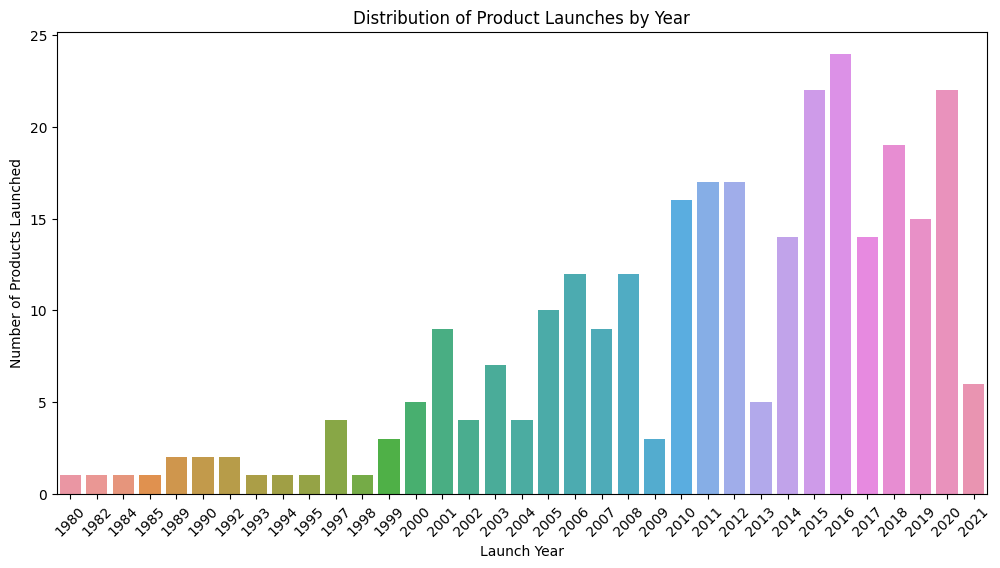

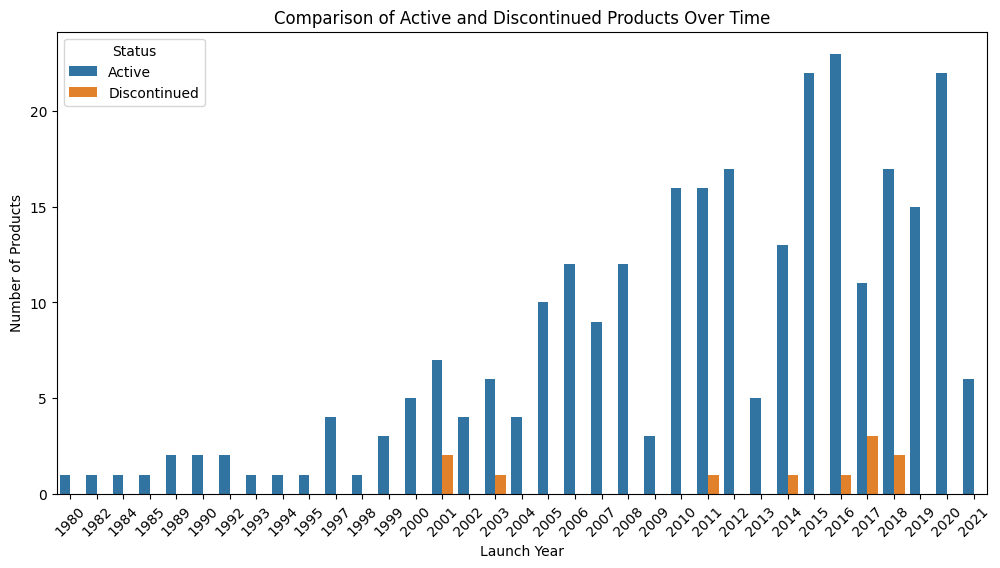

In [194]:
df['Launch Year'] = df['Launch Year'].astype('Int64', errors='ignore')

# Create a line plot to visualize the distribution of product launches by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Launch Year', data=df.sort_values('Launch Year'))
plt.title('Distribution of Product Launches by Year')
plt.xlabel('Launch Year')
plt.ylabel('Number of Products Launched')
plt.xticks(rotation=45)
plt.show()

# Create a line plot to compare the number of active and discontinued products over time
plt.figure(figsize=(12, 6))
sns.countplot(x='Launch Year', hue='Status', data=df.sort_values('Launch Year'))
plt.title('Comparison of Active and Discontinued Products Over Time')
plt.xlabel('Launch Year')
plt.ylabel('Number of Products')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()

In [195]:
df.to_csv('cleaned_data.csv')